<a href="https://colab.research.google.com/github/jiiwon129/ESAA/blob/main/ESAA_YB_WEEK10_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **[ 개념정리 ]**

**01 회귀 소개**

---

회귀
- 여러 개의 독립변수(X)와 1개의 종속변수(Y) 간의 상관관계를 모델링하는 기법
- **최적의 회귀 계수**를 찾아내는 것이 핵심

1. 단일 회귀
2. 다중 회귀

- 예측값(prediction): 연속형 숫자 값
  - 분류(Classification)은 카테고리와 같은 이산형 클래스

[ 대표적인 선형 회귀 모델 ]
- 일반 선형 회귀
  - 예측값과 실제 값의 RSS(Residual Sum of Sqaures)를 최소화할 수 있도록 회귀 계수를 최적화
  - 규제 X
- 릿지(Ridge)
  - 선형 회귀에 L2 규제 추가
  - L2 규제: 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 **회귀 계수값을 더 작게** 만드는 규제 모델
- 라쏘(Lasso):
  - 선형 회귀에 L1 규제 추가
  - L1 규제: **예측 영향력이 작은 피처의 회귀 계수를 0**으로 만들어 회귀 예측 시 피처가 선택되지 않도록 함
- 엘라스틱넷(ElasticNet): L2, L1 규제 결합 모델
  - L1 규제로 피처의 개수를 줄임 & L2 규제로 계수 값의 크기 조정
- 로지스틱 회귀(Logistic Regression)
  - 분류(Classification)에 사용되는 선형 모델

**02 단순 선형 회귀를 통한 회귀 이해**

---

- 독립변수와 종속변수 모두 1개
- 예측값
  - $\hat Y = w_0 + w_1*x$
- 잔차(Residual(
  - 실제 값과 회귀 모델의 차이에 따른 오류 값
  - 최적의 회귀 모델을 생성: 전체 데이터의 **잔차 합이 최소**가 되는 모델을 생성
  - $Error^2 = RSS$

[ 머신러닝 기반 회귀의 핵심 ]
- RSS를 최소로 하는 회귀 계수를 학습을 통해 찾는 것
- **w 변수(회귀 계수)가 중심 변수**

- RSS(Residual Sum of Squares)
  - $RSS(w_0,w_1) = \frac{1}{N} \sum_{i=1}^{N}(Y_i - \hat Y))^2$
  - 비용 함수(Cost Function)
    - 비용 함수가 반환하는 값을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류 값을 구하는 것이 목표
  - 손실 함수(Loss Function)

**03 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**

---

경사 하강법
- '점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하며 오류 값(예측값과 실제값의 차이)이 최소가 되는 W 파라미터를 구하는 방식
- $RSS(w_0,w_1) = \frac{1}{N} \sum_{i=1}^{N}(Y_i - \hat Y))^2$
  - $w_0, w_1$을 각각 편미분

  1. $w_1$ : $-\frac{2}{N} \sum_{i=1}^{N} x_i * (실제값_i - 예측값_i)$
  2. $w_0$ : $-\frac{2}{N} \sum_{i=1}^{N} (실제값_i - 예측값_i)$

  - 새로운 $w_1$ : $w_1 - k(-\frac{2}{N} \sum_{i=1}^{N} x_i * (실제값_i - 예측값_i))$
  k = 보정 계수

```
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N=len(y)

  # 먼저 w1_update, w0_update를 각각 w1,w0의 shape과 동일한 크기를 가진 0 값으로 초기화
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)

  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred=np.dot(X,w1.T)+w0
  diff=y-y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors=np.ones((N,1))
  
  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update,w0_update
```

```
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X,y,iters=10000):
  # w0와 w1을 모두 0으로 초기화.
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0
```

```
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost
```

경사 하강법은 수행 시간이 매우 오래 걸린다는 단점
- 따라서 **확률적 경사 하강법(Stochastic Gradient Descent)** 이용
  - 전체 입력 데이터가 아닌 일부 데이터만 이용해 w 업데이트 -> 상대적으로 빠른 속도

확률적 경사 하강법(Stochastic Gradient Descent)
```
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    for ind in range(iters):
      np.random.seed(ind)
      # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
      stochastic_random_index=np.random.permutation(X.shape[0])
      sample_X=X[stochastic_random_index[0:batch_size]]
      sample_y=y[stochastic_random_index[0:batch_size]]
      # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
      w1_update,w0_update=get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
      w1=w1-w1_update
      w0=w0-w0_update

    return w1,w0
```

[ 피처가 여러 개인 경우 ]

$\hat Y = X_{mat} * W^T$

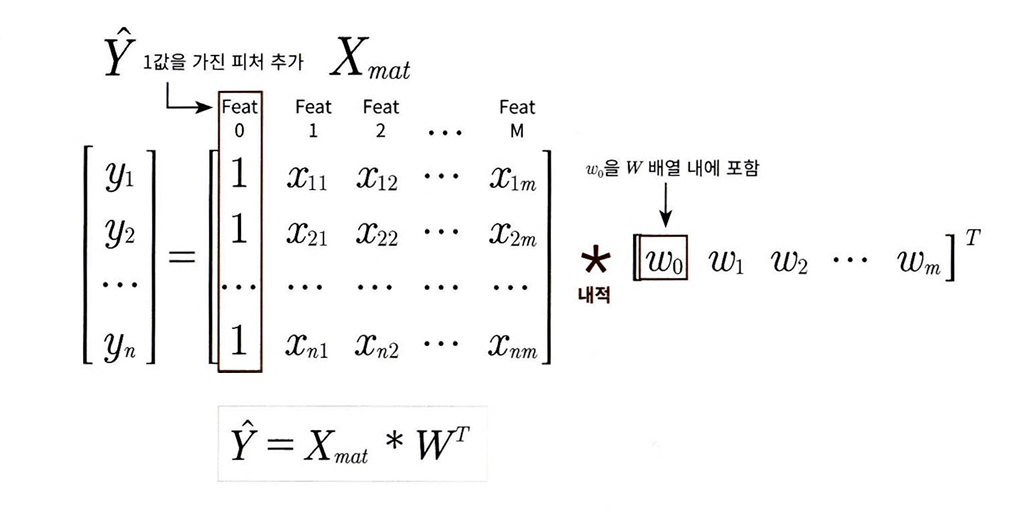

**04 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

---

**LinearRegression 클래스 - Ordinary Least Sqaures**
- 파라미터
  - fit_intercept: intercept 값을 계산할 지 말 지를 지정 (default=True=(intercept 사용))
  - normalize: True = 회귀 수행 전 입력 데이터 세트를 정규화
- 속성
  - coef_: 회귀 계수가 배열 형태로 저장
  - intercept_: 절편 값

- 다중 공선성(multi-collinearity)
  - 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커셔 오류에 민감해짐

**회귀 평가 지표**
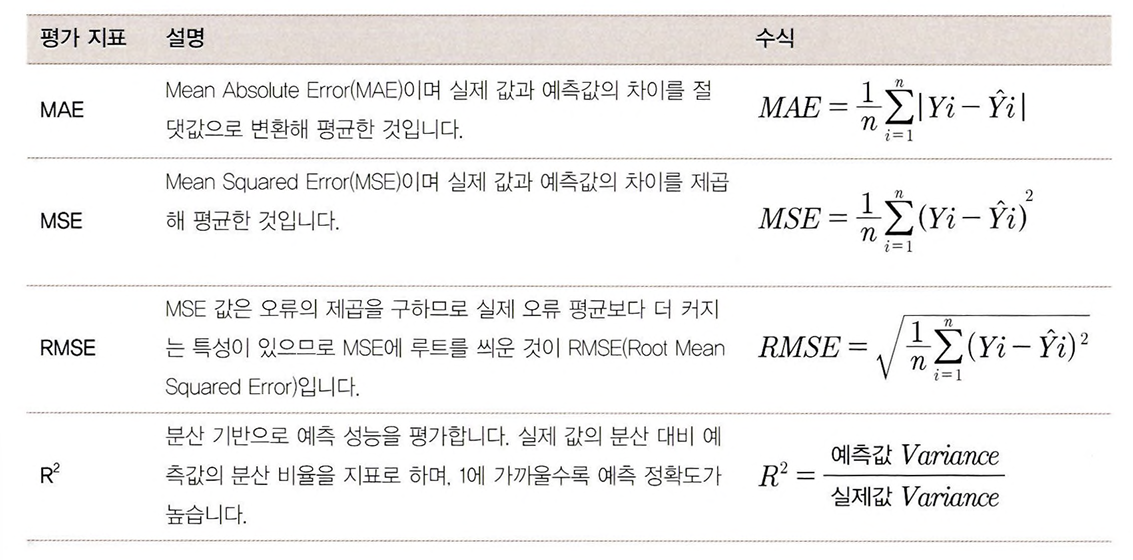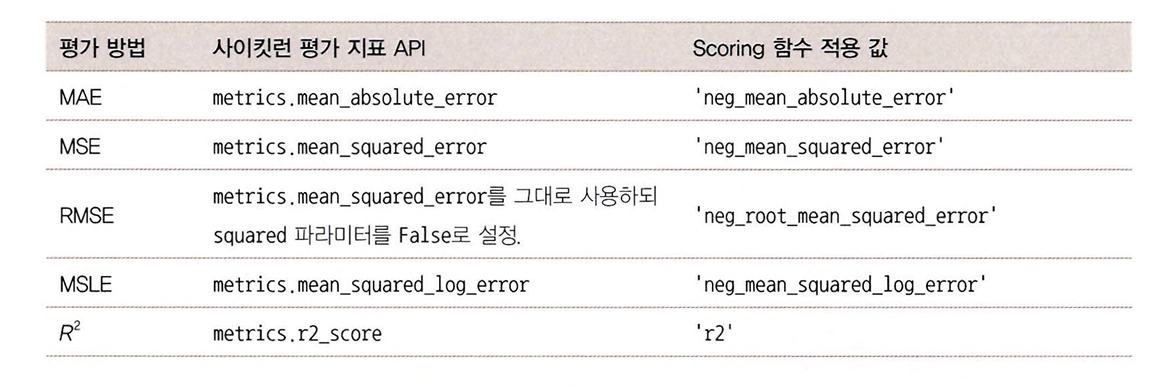


[ 유의할 점 ]
Scoring 함수에 'neg_mean_absolute_error'를 적용해 음수값을 반환
- 사이킷런의 Scoring 함수가 score 값이 클수록 좋은 평가로 결과로 자동 평가하기 때문.
- But 실제 값과 예측 값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이 됨
  -> 보정 필요

- neg_mean_absolute_error
  - == -1 * metrics.mean_absolute_error()

**05 다항 회귀와 과(대)적합/과소적합 이해**

---

다항 회귀
- $Y = w_0 + w_1 * x_1 + w_2 * x_2 + w_3 * x_1 * x_2 + ...$
- 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공 X
  - 비선형 함수를 선형 모델에 적용시키는 방법 사용
  - PolynomialFeatures 클래스를 통해 피처를 Polynomial 피처로 변환

```
from sklearn.preprocessing import PolynomialFeatures

# 3차 다항식 변환
PolynomialFeatures(degree=n).fit_transform(X)
```

**편향-분산 트레이드오프(Bias-Variance Trade off)**

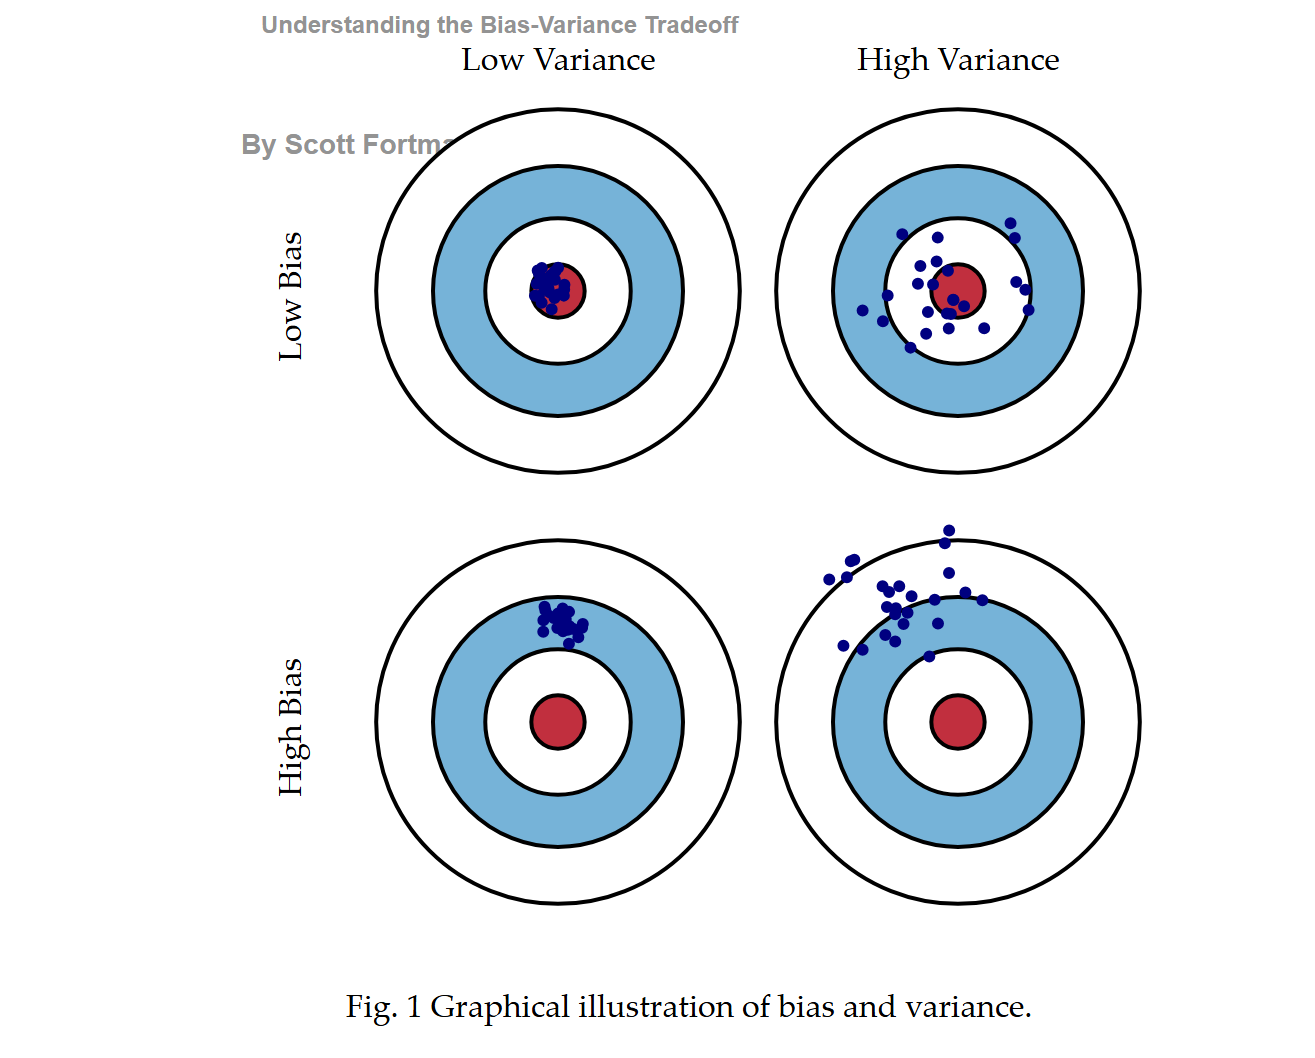

편향(Bias)와 분산(Variance)는 한 쪽이 높으면 한 쪽이 낮아지는 경향을 보임

[ Trade off ]

**High Bias Low Variance: Underfitting**

**Low Bias High Variance: Overfitting**

- Bias가 너무 높으면 전체 오류가 높아짐 -> 예측 성능 감소
- Bias를 낮추면 동시에 Variance가 높아지고 전체 오류가 낮아짐 : '골디락스' 지점
- Variance가 지속적으로 높아지면 전체 오류 값이 높아짐 -> 예측 성능 감소

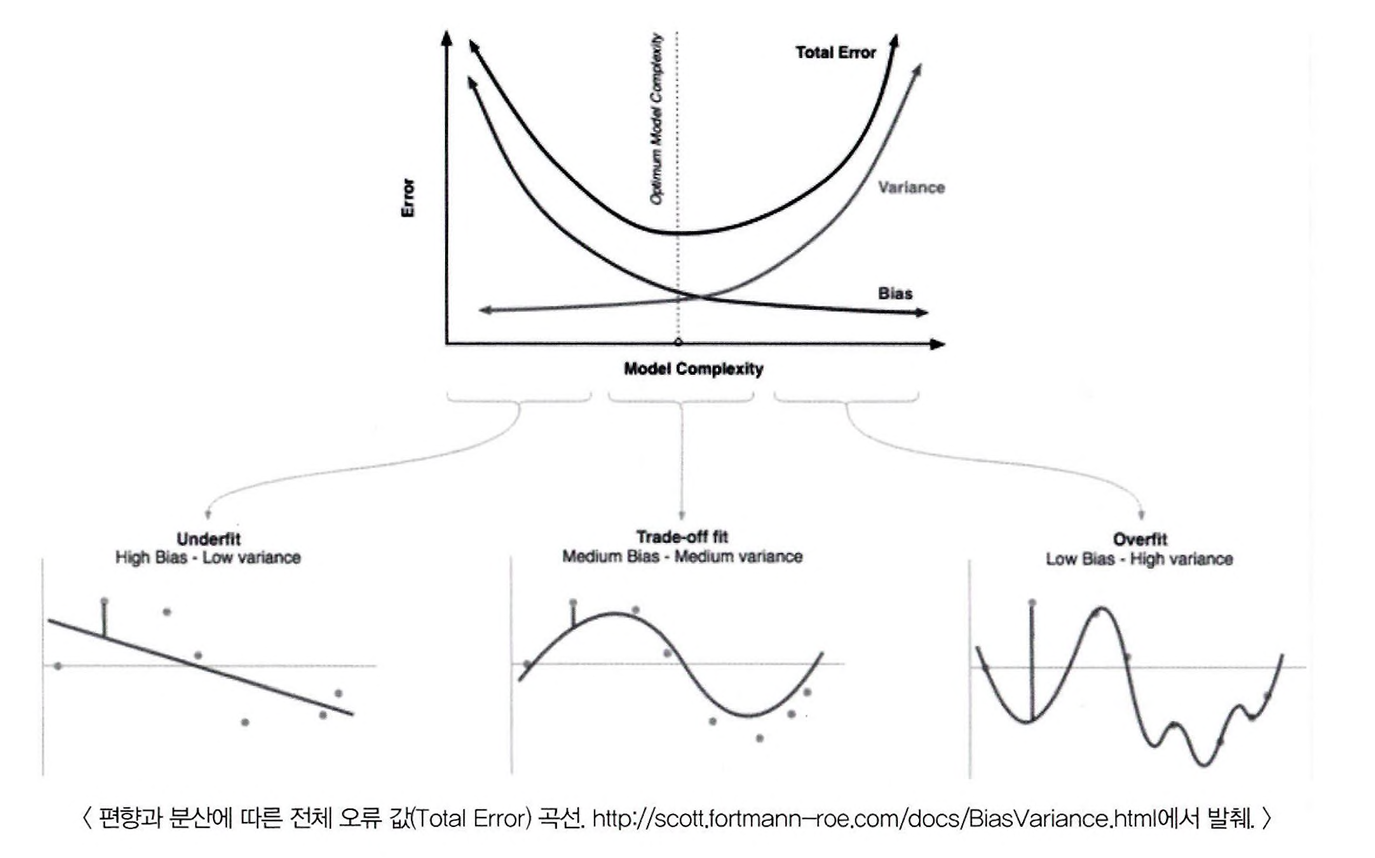

### **[ 필사 ]**

**03 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**

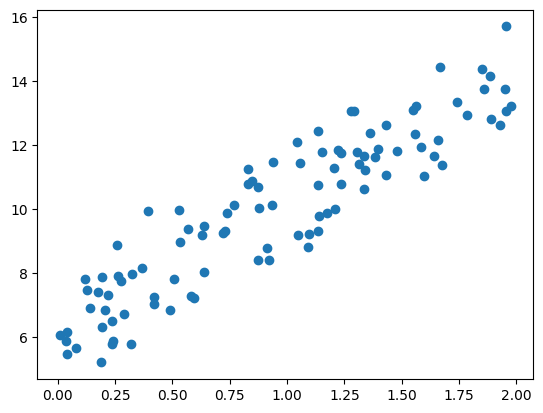

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X=2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

# X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y)

In [23]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

In [24]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N=len(y)

  # 먼저 w1_update, w0_update를 각각 w1,w0의 shape과 동일한 크기를 가진 0 값으로 초기화
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)

  # 예측 배열 계산하고 예측과 실제 값의 차이 계산
  y_pred=np.dot(X,w1.T)+w0
  diff=y-y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors=np.ones((N,1))

  # w1과 w0을 업데이트할 w1_update와 w0_update 계산
  w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update,w0_update

In [25]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X,y,iters=10000):
  # w0와 w1을 모두 0으로 초기화.
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
  for ind in range(iters):
    w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

In [26]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

w1,w0=gradient_descent_steps(X,y,iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


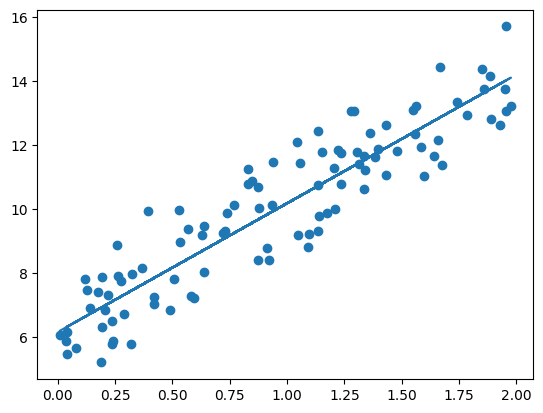

In [27]:
plt.scatter(X,y)
plt.plot(X,y_pred)

확률적 경사 하강법

In [28]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    for ind in range(iters):
      np.random.seed(ind)
      # 전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
      stochastic_random_index=np.random.permutation(X.shape[0])
      sample_X=X[stochastic_random_index[0:batch_size]]
      sample_y=y[stochastic_random_index[0:batch_size]]
      # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
      w1_update,w0_update=get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
      w1=w1-w1_update
      w0=w0-w0_update

    return w1,w0

In [29]:
w1,w0=stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:',round(w1[0,0],3),'w0:',round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


**04 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

LinearRegression 클래스 - Ordinary Least Squares

```class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False,copy_X=True,n_jobs=1)                                  ```

LinearRegression을 이용해 보스턴 주택 가격 회귀 구현

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

data_url="http://lib.stat.cmu.edu/datasets/boston"
raw_df=pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data=np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target=raw_df.values[1::2, 2]

bostonDF=pd.DataFrame(data, columns=['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','DIS',
                                     'RAD','TAX','PTRATIO','B','LSTAT'])

bostonDF['PRICE']=target
# boston 데이터 세트의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가함.
print('Boston 데이터 세트 크기: ',bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기:  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


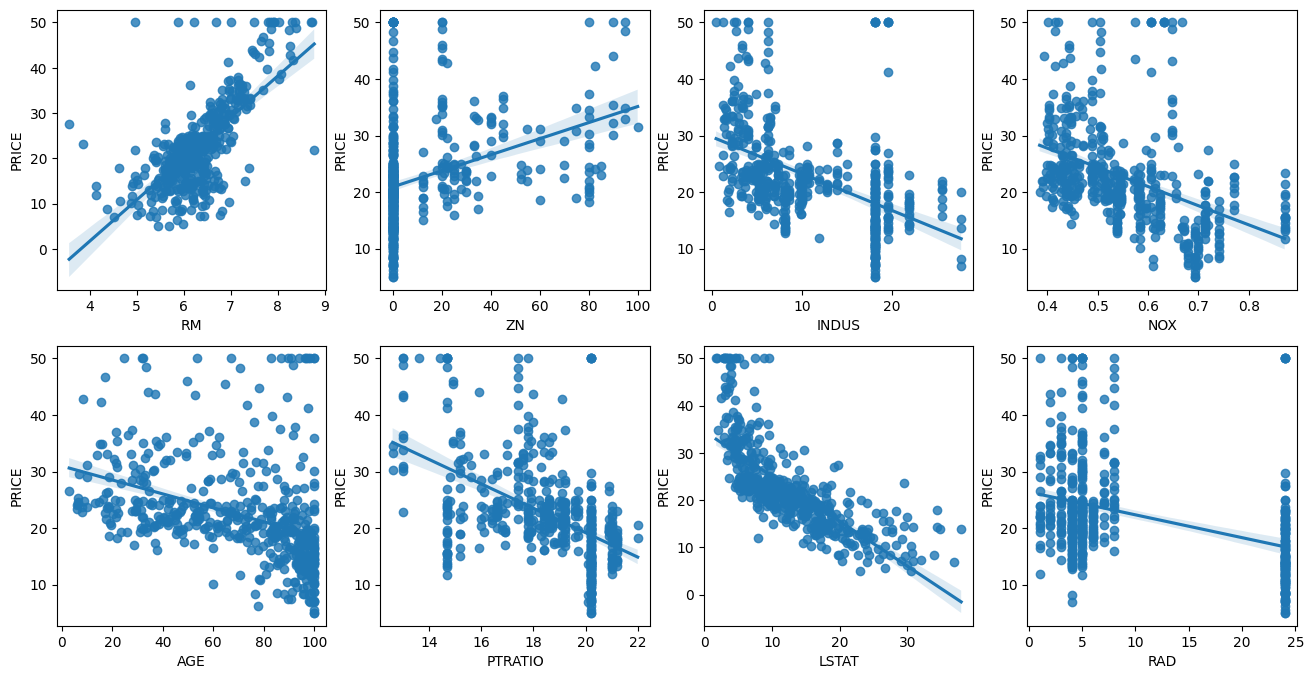

In [31]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig,axs=plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
  row=int(i/4)
  col=i%4
  # seaborn의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
  sns.regplot(x=feature,y='PRICE',data=bostonDF,ax=axs[row][col])

RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타남

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test=train_test_split(X_data,y_target,test_size=0.3,
                                               random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [33]:
print('절편 값:',lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

절편 값: 40.995595172164826
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [34]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff=pd.Series(data=np.round(lr.coef_,1),
                index=X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
B,0.0
TAX,-0.0
AGE,0.0
CRIM,-0.1
LSTAT,-0.6


RM이 양(+)의 값으로 회귀 계수가 가장 크며, NOX의 회귀 계수 - 값이 매우 큼

In [35]:
from sklearn.model_selection import cross_val_score

y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr=LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores=cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:',np.round(rmse_scores,2))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


**05 다항 회귀와 과(대)적합/과소적합 이해**

[$x_1, x_2$]를 2차 다항값으로 [$1,x_1,x_2,x_1^2,x_1x_2,x_2^2$]로 변환

In [36]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

# degress=2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


단항 계수 피처 [$x_1=0, x_2=1$]를 2차 다항 계수 [$1,x_1=0,x_2=1,x_1^2=0,x_1x_2=0,x_2^2=0$]로 변경

[$x_1=2, x_2=3$]은 [1,2,3,4,6,9]로 변환

In [37]:
def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y=polynomial_func(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


PolynomialFeatures(degree=3)
- 단항 계수 피처 [$x_1,x_2$]를 3차 다항 계수 [$1,x_1,x_2,x_1^2,x_1x_2,x_2^2,x_1^3,x_1^2x_2,x_1x_2^2,x_2^3$]로 변환

In [38]:
# 3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n',np.round(model.coef_,2))
print('Polynomial 회귀 Shape:',model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model=Pipeline([('poly',PolynomialFeatures(degree=3)),
                ('linear',LinearRegression())])
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model=model.fit(X,y)

print('Polynomial 회귀 계수\n',np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


다항 회귀를 이용한 과소적합 및 과적합 이해

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
  return np.cos(1.5 * np.pi *X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X =np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples)*0.1

예측 결과를 비교할 다항식의 차수를 각각 1,4,15로 변경

다항식 차수별로 학습을 수행한 뒤 cross_val_score()로 MSE 값을 구해 차수별 예측 성능 평가
- [0,1]로 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선 시각화


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


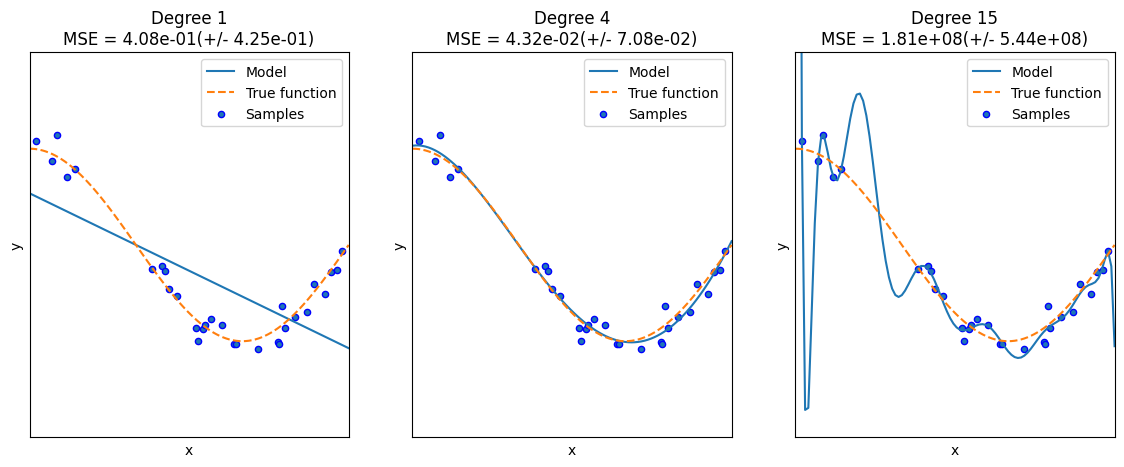

In [53]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
  ax = plt.subplot(1, len(degrees), i+1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree별로 Polynomial 반환합니다.
  polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
  pipeline.fit(X.reshape(-1, 1), y)

  # 교차 검증으로 다항 회귀를 평가합니다.
  scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
  # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
  X_test = np.linspace(0, 1, 100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
  # 실제 값 곡선
  plt.plot(X_test, true_fun(X_test), '--', label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')

  plt.xlabel("x");plt.ylabel("y");plt.xlim((0, 1));plt.ylim((-2, 2)); plt.legend(loc="best")
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

1. Degree 1
- 단순 선형 회귀와 같음
- 코사인 데이터를 예측하기에는 너무 단순해보임
- High Bias

2. Degree 4
- 실제 데이터 세트와 유사
- MSE가 0.04로 가장 뛰어난 예측 성능을 나타냄

3. Degree 15
- MSE 값이 터무니없이 큼
- 예측 곡선이 학습 데이터만 정확히 예측, 테스트 값의 실제 곡선과는 완전히 다른 형태
- 과적합
- High Variance